## DECISION TREES

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read and explore the data

In [233]:
df = pd.read_csv("Dataset/train_csv.csv")

In [234]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [236]:
#converting string(object) datatype to categorical
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping).fillna(-1).astype(int)

married_mapping = {'Yes':0,'No':1}
df['Married'] = df['Married'].map(married_mapping).fillna(-1).astype(int)


education_mapping = {'Graduate':0,'Not Graduate':1}
df['Education'] = df['Education'].map(education_mapping).astype(int)


self_employment_mapping = {'Yes':0,'No':1}
df['Self_Employed'] = df['Self_Employed'].map(self_employment_mapping).fillna(-1).astype(int)


property_area_mapping = {'Urban':0,'Rural':1,'Semiurban':2}
df['Property_Area'] = df['Property_Area'].map(property_area_mapping).astype(int)

loan_status_mapping = {'Y':0,'N':1}
df['Loan_Status'] = df['Loan_Status'].map(loan_status_mapping).astype(int)

df['Dependents'] = df['Dependents'].replace({'1':1,'2':2,'3+':3}).fillna(-1).astype(int)

la_avg = df['LoanAmount'].mean()
df['LoanAmount']=df['LoanAmount'].fillna(la_avg)

lat_avg = df['Loan_Amount_Term'].mean()
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(lat_avg)

df['Credit_History'] = df['Credit_History'].fillna(-1).astype(int)

##### since its a decision tree data preprocessing maybe or may not be done

In [237]:
#checking some information updating the above cell

In [238]:
df['Education'].isnull().sum()
df['Education'].unique()

array([0, 1])

In [239]:
df['Self_Employed'].unique()

array([ 1,  0, -1])

In [240]:
df['Property_Area'].unique()

array([0, 1, 2])

In [241]:
df['Property_Area'].isnull().sum()

0

In [242]:
df['Loan_Status'].isnull().sum()

0

In [243]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,146.412162,360.0,1,0,0
1,LP001003,0,0,1,0,1,4583,1508.0,128.000000,360.0,1,1,1
2,LP001005,0,0,0,0,0,3000,0.0,66.000000,360.0,1,0,0
3,LP001006,0,0,0,1,1,2583,2358.0,120.000000,360.0,1,0,0
4,LP001008,0,1,0,0,1,6000,0.0,141.000000,360.0,1,0,0


In [244]:
#train and test split

from sklearn.model_selection import train_test_split

X = df.drop(['Loan_Status','Loan_ID'],axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [245]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,1,5849,0.0,146.412162,360.0,1,0
1,0,0,1,0,1,4583,1508.0,128.000000,360.0,1,1
2,0,0,0,0,0,3000,0.0,66.000000,360.0,1,0
3,0,0,0,1,1,2583,2358.0,120.000000,360.0,1,0
4,0,1,0,0,1,6000,0.0,141.000000,360.0,1,0


In [246]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int32
dtype: object

In [247]:
df['Loan_Amount_Term'].isnull().sum()

0

In [248]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [249]:
df['Credit_History'].isnull().sum()

0

In [250]:
df['Credit_History'].unique()

array([ 1,  0, -1])

In [251]:
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,0,1,0,0,1,5849,0.0,146.412162,360.0,1,0,0,5849.0
1,LP001003,0,0,1,0,1,4583,1508.0,128.000000,360.0,1,1,1,6091.0
2,LP001005,0,0,0,0,0,3000,0.0,66.000000,360.0,1,0,0,3000.0
3,LP001006,0,0,0,1,1,2583,2358.0,120.000000,360.0,1,0,0,4941.0
4,LP001008,0,1,0,0,1,6000,0.0,141.000000,360.0,1,0,0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,1,0,0,1,2900,0.0,71.000000,360.0,1,1,0,2900.0
610,LP002979,0,0,3,0,1,4106,0.0,40.000000,180.0,1,1,0,4106.0
611,LP002983,0,0,1,0,1,8072,240.0,253.000000,360.0,1,0,0,8312.0
612,LP002984,0,0,2,0,1,7583,0.0,187.000000,360.0,1,0,0,7583.0


<AxesSubplot:xlabel='LoanAmount', ylabel='Total_income'>

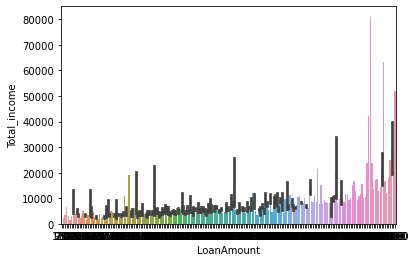

In [252]:
sns.barplot(data=df,x='LoanAmount',y='Total_income')

In [253]:
# train the model using DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy') #entropy is suitable for categorical data
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [254]:
classifier.score(X_train,y_train) #its definitely a overfit.we need to prune.

1.0

In [255]:
classifier.score(X_test,y_test)

0.7154471544715447

### Visualization of a decision tree

In [256]:
from sklearn import tree

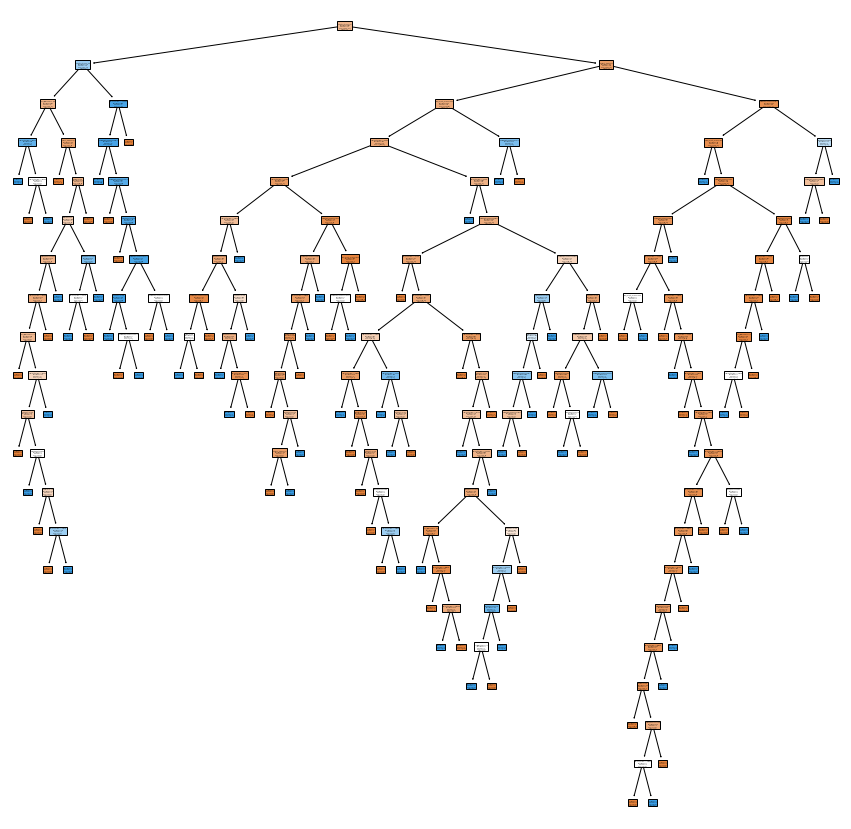

In [258]:
plt.figure(figsize=(15,15))

tree.plot_tree(classifier,feature_names=list(X.columns),class_names=['Yes','No'],filled=True)
plt.show()

Text(0, 0.5, 'Importance')

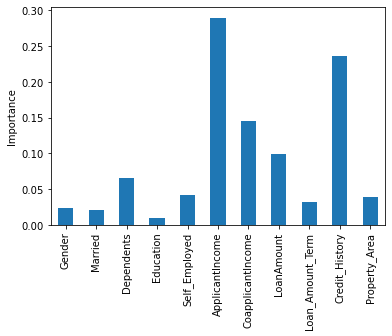

In [261]:
#important features

importance = classifier.feature_importances_
feature_importance = pd.Series(importance,index=X.columns)
feature_importance.plot(kind='bar')
plt.ylabel('Importance')

### Pruning the tree

In [265]:
#pre-pruning

grid = {
    'max_depth':[3,4,5,6,7],
    'min_samples_split':[2,3,4,5,6], #0-40 suggested
    'min_samples_leaf':[2,3,4,5,6] #0-20 suggested
}

from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state=40)
gcv = GridSearchCV(estimator=classifier,param_grid=grid)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [264]:
classifier.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [266]:
classifier= gcv.best_estimator_

In [267]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=40)

In [268]:
classifier.score(X_train,y_train)

0.8309572301425662

In [269]:
classifier.score(X_test,y_test)

0.7804878048780488

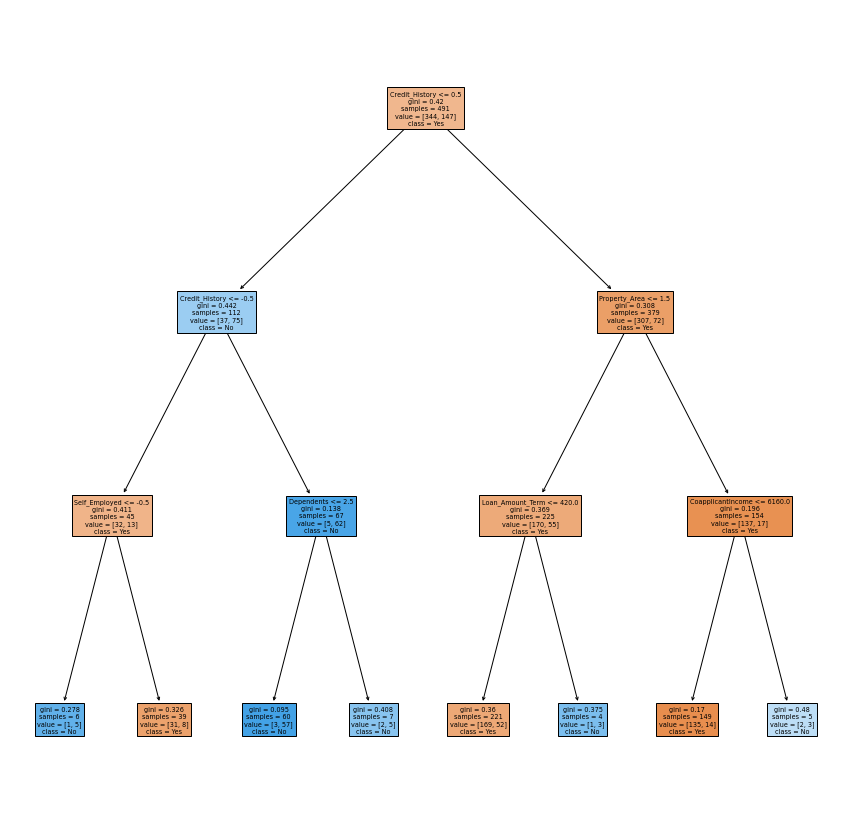

In [270]:
plt.figure(figsize=(15,15))

tree.plot_tree(classifier,feature_names=list(X.columns),class_names=['Yes','No'],filled=True)
plt.show()

In [271]:
#post pruning -> cost complexity pruning

path = classifier.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
list(ccp_alphas)

[0.0,
 0.0014187138210605445,
 0.004239713536466877,
 0.005046080916445463,
 0.0066923322086175074,
 0.008359009173673125,
 0.044421489198368545,
 0.08102293788259679]

In [272]:
ccp_alphas[:-1]

array([0.        , 0.00141871, 0.00423971, 0.00504608, 0.00669233,
       0.00835901, 0.04442149])

In [273]:
train_scores,test_scores=[],[]
for alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(random_state=40,ccp_alpha = alpha)
    model = classifier.fit(X_train,y_train)
    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_test,y_test))
    

In [275]:
train_scores,test_scores

([1.0,
  1.0,
  0.8716904276985743,
  0.824847250509165,
  0.824847250509165,
  0.8167006109979633,
  0.7780040733197556,
  0.7780040733197556],
 [0.7154471544715447,
  0.7154471544715447,
  0.7886178861788617,
  0.7804878048780488,
  0.7804878048780488,
  0.7804878048780488,
  0.7398373983739838,
  0.7398373983739838])

In [276]:
ix = test_scores.index(max(test_scores))

In [277]:
best_alpha=ccp_alphas[ix]

In [286]:
classifier = DecisionTreeClassifier(random_state=1234,ccp_alpha=best_alpha)
model=classifier.fit(X_train,y_train)

In [287]:
model.score(X_train,y_train)

0.8716904276985743

In [288]:
model.score(X_test,y_test)

0.7886178861788617

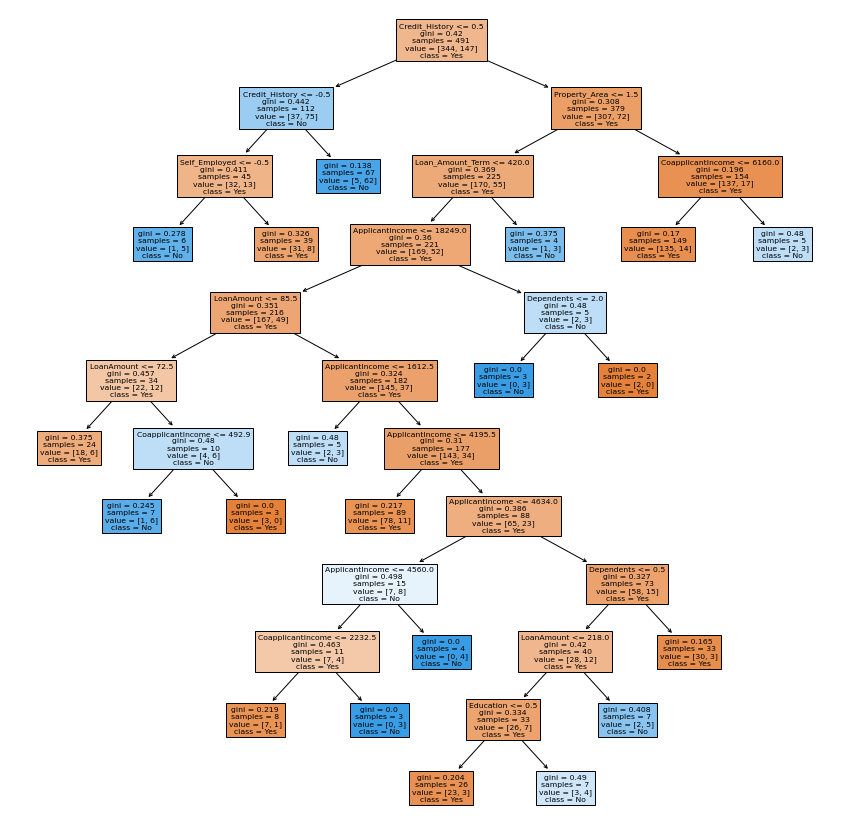

In [289]:
plt.figure(figsize=(15,15))

tree.plot_tree(classifier,feature_names=list(X.columns),class_names=['Yes','No'],filled=True)
plt.show()